In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/singhrau0/Big-Data-Preprocessing/main/titanic_dataset.csv")
df

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
y = df['Survived']

In [4]:
X = df[['Pclass','Fare']]

In [5]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25, random_state=2529)

In [6]:
lgr = LogisticRegression()

In [7]:
lgr.fit(X_train,y_train)

LogisticRegression()

In [8]:
lgr.score(X_test,y_test)

0.6771300448430493

In [9]:
lgr.predict([[3,10]])

C:\Users\dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [10]:
X = df[['Fare','Pclass']]

In [11]:
X['Fare'] = X['Fare']*234567

C:\Users\dell\AppData\Local\Temp\ipykernel_4064\2752913939.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Fare'] = X['Fare']*234567


In [12]:
mx = MinMaxScaler()

In [13]:
X['Fare'] = mx.fit_transform(X[['Fare']])

C:\Users\dell\AppData\Local\Temp\ipykernel_4064\1892314633.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Fare'] = mx.fit_transform(X[['Fare']])


In [14]:
X

,Fare,Pclass
0,0.014151,3
1,0.139136,1
2,0.015469,3
3,0.103644,1
4,0.015713,3
...,...,...
886,0.025374,2
887,0.058556,1
888,0.045771,3
889,0.058556,1


In [15]:
y_pre_pro = lgr.predict_proba(X_test)[:, 1]

In [16]:
mse = mean_squared_error(y_test, y_pre_pro)
mse

0.20649427362262213

In [17]:
rs = r2_score(y_test, y_pre_pro)
rs

0.10238166669760707

In [18]:
l = X_test.shape[0]
t = X_test.shape[1]

In [19]:
ars = 1 - (1 - rs) * (l - 1) / (l - t - 1)
ars

0.09422150003122165

In [20]:
yactual = np.random.randint(0,2,30)
ypred = np.random.randint(0,2,30)

In [48]:
class ConfusionMatrix:
    def __init__(self,yactual,ypred):
        self.yactual = yactual
        self.ypred = ypred
        self.TN = 0
        self.TP = 0
        self.FN = 0
        self.FP = 0

        for i,j in zip(self.yactual,self.ypred):
            if i==1 and j==1:
                self.TP+=1
            if i==1 and j==0:
                self.FN+=1
            if i==0 and j==1:
                self.FP+=1
            if i==0 and j==0:
                self.TN+=1
        print(self.TN,self.TP,self.FP,self.FN)
    def precision(self):
        return self.TP/(self.TP+self.FP)
    def recall(self):
        return self.TP/(self.TP+self.FN)
    def f_score1(self):
        return 2*(self.precision()*self.recall()/self.precision()+self.recall())

In [52]:
ConfusionMatrix(yactual,ypred).precision()

4 8 10 8


0.4444444444444444

In [23]:
cm.classificationreport()

4 8 10 8


In [50]:
cm.precision()

0.4444444444444444

In [25]:
cm.recall()

0.5

In [26]:
cm.f_score1()

2.0

In [27]:
print(classification_report(yactual,ypred))

              precision    recall  f1-score   support

           0       0.33      0.29      0.31        14
           1       0.44      0.50      0.47        16

    accuracy                           0.40        30
   macro avg       0.39      0.39      0.39        30
weighted avg       0.39      0.40      0.39        30



In [28]:
confusion_matrix(yactual,ypred)

array([[ 4, 10],
       [ 8,  8]], dtype=int64)

In [29]:
pred = [9,5]

In [30]:
def KNN(X,y,K,pred):
    li = []
    for i,j in zip(X[:,0],X[:,1]):
        di = ((i-pred[0])**2+(j-pred[1])**2)**0.5
        li.append(di)
    j = li
    j = sorted(j)
    j = j[:K]
    ydata = []
    for i in j:
        ydata.append(y[li.index(i)])
    print(pd.DataFrame(ydata).index[0])


In [31]:
def KNN(X,y,K,pred):
    li = []
    X['ydata'] = y
    for i,j in zip(X.iloc[:,0],X.iloc[:,1]):
        di = ((i-pred[0])**2+(j-pred[1])**2)**0.5
        li.append(di)
    X['distance'] = li
    X = X.sort_values(by='distance')
    X = X.iloc[:K]
    print(X['ydata'].value_counts().index[0])    

In [32]:
X = pd.DataFrame(np.random.randint(1,50,(20,2)))
y = np.random.randint(0,2,20)

In [33]:
KNN(X,y,3,[45,30])

1


In [34]:
X

,0,1,ydata,distance
0,20,25,1,25.495098
1,47,49,0,19.104973
2,15,24,0,30.594117
3,42,24,1,6.708204
4,32,43,1,18.384776
5,23,41,0,24.596748
6,34,44,1,17.804494
7,14,15,1,34.438351
8,31,47,1,22.022716
9,46,10,0,20.024984


In [35]:
y

array([1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0])

--------------MOVIE DATASET--------------------

In [36]:
mve = pd.read_csv("https://raw.githubusercontent.com/singhrau0/Big-Data-Preprocessing/main/Movie_Data.csv")
mve

,Marketin_expense,Production_expense,Multiplex_coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,Time_taken,Twitter_hastags,Avg_age_actors,Num_multiplex,3D_available,Genre_Thriller,Genre_Drama,Genre_Comedy,Collection
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,527367,109.60,223.840,23,494,1,1,0,0,2.266667
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,494055,146.64,243.456,42,462,0,0,1,0,2.106667
2,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,547051,147.88,2022.400,38,458,0,0,0,1,2.980000
3,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,516279,185.36,225.344,45,472,1,0,1,0,2.893333
4,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,531448,176.48,225.792,55,395,0,0,1,0,3.080000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,21.2526,78.86,0.427,36624.115,142.6,8.680,8.775,8.620,8.970,6.80,492480,186.96,243.584,27,561,0,0,0,0,2.160000
502,20.9054,78.86,0.427,33996.600,150.2,8.780,8.945,8.770,8.930,7.80,482875,132.24,263.296,20,600,1,0,0,0,2.040000
503,21.2152,78.86,0.427,38751.680,164.5,8.830,8.970,8.855,9.010,7.80,532239,109.56,243.824,31,576,0,0,0,1,2.260000
504,22.1918,78.86,0.427,37740.670,162.8,8.730,8.845,8.800,8.845,6.80,496077,158.80,303.520,47,607,1,0,0,1,2.133333


In [37]:
mve.head()

,Marketin_expense,Production_expense,Multiplex_coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,Time_taken,Twitter_hastags,Avg_age_actors,Num_multiplex,3D_available,Genre_Thriller,Genre_Drama,Genre_Comedy,Collection
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,527367,109.60,223.840,23,494,1,1,0,0,2.266667
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,494055,146.64,243.456,42,462,0,0,1,0,2.106667
2,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,547051,147.88,2022.400,38,458,0,0,0,1,2.980000
3,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,516279,185.36,225.344,45,472,1,0,1,0,2.893333
4,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,531448,176.48,225.792,55,395,0,0,1,0,3.080000


In [38]:
X = mve[['Budget','Movie_length']]

In [39]:
y = mve ['Collection']

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [41]:
lr = LinearRegression()

In [42]:
lr.fit(X_train, y_train)

LinearRegression()

In [43]:
y_pre = lr.predict(X_test)

In [44]:
mse = mean_squared_error(y_test, y_pre)
mse

0.1787447053544096

In [45]:
r_s = r2_score(y_test, y_pre)
r_s

0.45463473049424696

In [46]:
n = X_test.shape[0]
k = X_test.shape[1]

In [47]:
a_r_s = 1 - (1 - rs) * (n - 1) / (n - k - 1)
a_r_s

0.08424796299452841

In [64]:
import math

x = list(range(1,11,2))
y = list(range(11,21,2))
z = [40,50]

def Distance(x,y):
    print("x: ", x)
    print("y: ", y)
    counter = 0
    for x1,y1 in zip(x,y):
        dummyx = x.copy()
        dummyy = y.copy()
        dummyx.pop(counter)
        dummyy.pop(counter)
        for i in range(len(x)-1):
            x2 = dummyx[i]
            y2 = dummyy[i]
            distance = math.sqrt((x2-x1)**2 + (y2-y1)**2)
            print(f'for points {x1, y1} and {x2, y2} Distance is {distance}')
        counter= counter + 1

Distance(x,y)

x:  [1, 3, 5, 7, 9]
y:  [11, 13, 15, 17, 19]
for points (1, 11) and (3, 13) Distance is 2.8284271247461903
for points (1, 11) and (5, 15) Distance is 5.656854249492381
for points (1, 11) and (7, 17) Distance is 8.48528137423857
for points (1, 11) and (9, 19) Distance is 11.313708498984761
for points (3, 13) and (1, 11) Distance is 2.8284271247461903
for points (3, 13) and (5, 15) Distance is 2.8284271247461903
for points (3, 13) and (7, 17) Distance is 5.656854249492381
for points (3, 13) and (9, 19) Distance is 8.48528137423857
for points (5, 15) and (1, 11) Distance is 5.656854249492381
for points (5, 15) and (3, 13) Distance is 2.8284271247461903
for points (5, 15) and (7, 17) Distance is 2.8284271247461903
for points (5, 15) and (9, 19) Distance is 5.656854249492381
for points (7, 17) and (1, 11) Distance is 8.48528137423857
for points (7, 17) and (3, 13) Distance is 5.656854249492381
for points (7, 17) and (5, 15) Distance is 2.8284271247461903
for points (7, 17) and (9, 19) Dista

In [98]:
import math
import numpy as np
import pandas as pd

x = list(range(1,11,2))
y = list(range(11,21,2))
a = list(np.random.randint(0, 2, 5))
z = [40,50]

def KNN(x, y, a, z, c):
    k = int(input("Enter Hyper Parameter (Integer value): "))
    distance_list= []
    x1 = z[0]
    y1 = z[1]
    for x2, y2 in zip(x,y):
        distance = math.sqrt((x2-x1)**2 + (y2-y1)**2)
        distance_list.append(distance)

    sorted_Distance = sorted(list(enumerate(distance_list)))[::-1]
    indexes = [item[0] for item in sorted_Distance[:k]]
    index_values = []
    for index in indexes:
        index_values.append(a[index])
    
    if c == 'c':
        predicted_value = pd.Series(index_values).mode()[0]
    else:
        predicted_value= pd.Series(index_values).mean()
    return predicted_value


predictedValue= KNN(x, y, a, z, 'c')
print(f"for {z} predicted value is {predictedValue}")

for [40, 50] predicted value is 0


In [21]:
import pandas as pd
import numpy as np

# Seed for reproducibility
np.random.seed(42)

# Generate features
feature1 = np.random.randint(18, 70, 100)  # Age between 18 and 70
feature2 = np.random.uniform(20000, 120000, 100)  # Income between 20k and 120k
feature3 = np.random.choice(["High School", "Bachelor", "Master/PhD"], 100)  # Education level: 0=High School, 1=Bachelor, 2=Master/PhD
feature4 = np.random.uniform(0, 40, 100)  # Years of experience between 0 and 40

# Regression target: a continuous variable (e.g., house price or income level)
y_reg = feature1 * 1000 + feature4 * 500 + np.random.normal(0, 10000, 100)

# Classification target: a categorical variable (e.g., risk category)
y_clf = np.where(y_reg > 60000, 'High', np.where(y_reg > 40000, 'Medium', 'Low'))

# Create DataFrame
df = pd.DataFrame({
    'Age': feature1,
    'Income': feature2,
    'Education': feature3,
    'Experience': feature4,
    'House Price': y_reg,
    'Risk Category': y_clf
})

# Display the dataset
# Label encoding for Education
df['Education'] = df['Education'].astype('category').cat.codes
df['Risk Category'] = df['Risk Category'].astype('category').cat.codes
print("Columns: ", df.columns.to_list())
print(df)



Columns:  ['Age', 'Income', 'Education', 'Experience', 'House Price', 'Risk Category']
    Age         Income  Education  Experience   House Price  Risk Category
0    56   36526.693906          1   38.122874  71817.482465              0
1    69   21563.640674          2   13.230012  80861.096100              0
2    46   62340.148071          2   22.110599  88925.632717              0
3    32   59488.151818          2   22.891699  44287.484593              2
4    60   49348.817472          0   39.213263  89332.960343              0
..  ...            ...        ...         ...           ...            ...
95   42   59882.444244          0   30.534577  64599.022108              0
96   62  101643.187322          1   32.276519  67096.041656              0
97   58   99834.512498          0   13.852173  72541.804835              0
98   46   35071.754397          2   18.586953  49800.894443              2
99   32   70819.877674          1   25.990947  20403.540032              1

[100 rows x 

In [ ]:
import math
import numpy as np
import pandas as pd

def KNN(DataFrame, TrainFeatures, TrainResults, Testset, ProblemType, Train= 80, Test=20):
    k = int(input("Enter Hyper Parameter (Integer value): "))
    distance_list= []
    x1 = z[0]
    y1 = z[1]
    for x2, y2 in zip(x,y):
        distance = math.sqrt((x2-x1)**2 + (y2-y1)**2)
        distance_list.append(distance)

    sorted_Distance = sorted(list(enumerate(distance_list)))[::-1]
    indexes = [item[0] for item in sorted_Distance[:k]]
    index_values = []
    for index in indexes:
        index_values.append(a[index])
    
    if c == 'c':
        predicted_value = pd.Series(index_values).mode()[0]
    else:
        predicted_value= pd.Series(index_values).mean()
    return predicted_value


predictedValue= KNN(x, y, a, z, 'c')
print(f"for {z} predicted value is {predictedValue}")

In [22]:
import pandas as pd

def split_data(df, feature_cols, target_col, test_size=0.2, random_state=len(df)/2):
    X = df[feature_cols]
    y = df[target_col]

    df = df.sample(frac=1, random_state=random_state).reset_index(drop=True)
    
    X = df[feature_cols]
    y = df[target_col]
    split_index = int((1 - test_size) * len(df))
    X_train = X[:split_index]
    X_test = X[split_index:]
    y_train = y[:split_index]
    y_test = y[split_index:]

    return X_train, X_test, y_train, y_test
    

feature_columns = ['Age', 'Income', 'Education', 'Experience', 'House Price']
target_column = 'Risk Category'
X_train, X_test, y_train, y_test = split_data(df, feature_columns, target_column, test_size=0.2, random_state=42)

print(f"Training Features (X_train):\n{X_train}\n\nTraining Target (y_train):\n{y_train}\n\nTesting Features (X_test):\n{X_test}\n\nTesting Target (y_test):\n{y_test}")



Training Features (X_train):
    Age         Income  Education  Experience   House Price
0    32   83435.134470          0   29.201573  65208.566872
1    43   32208.795470          0   38.610073  59322.024376
2    23   60383.617106          2   17.132579  17171.673532
3    26   82435.404813          2   34.416185  32096.454239
4    38  108046.783902          0   33.557340  62423.452395
..  ...            ...        ...         ...           ...
75   64   84769.012054          1   16.454156  74903.438243
76   43   91227.058992          0    9.591494  36034.472403
77   59   40171.920234          2    7.770958  67371.965811
78   43  118342.314089          1    0.686444  48890.149979
79   61   55256.885633          1    5.534124  30126.106584

[80 rows x 5 columns]

Training Target (y_train):
0     0
1     2
2     1
3     1
4     0
     ..
75    0
76    1
77    0
78    2
79    1
Name: Risk Category, Length: 80, dtype: int8

Testing Features (X_test):
    Age         Income  Education  Expe

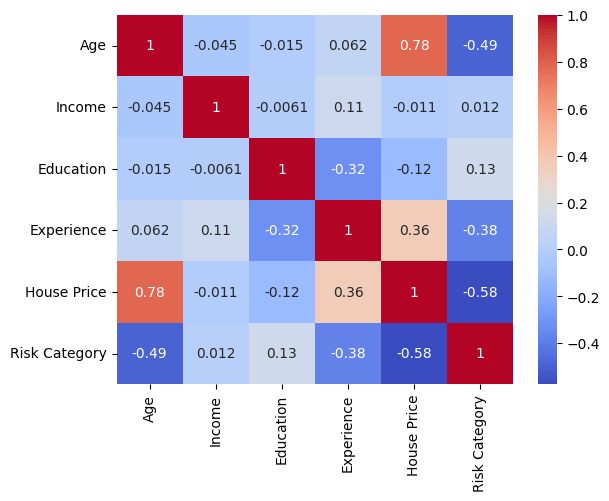

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.show()


In [24]:
from sklearn.feature_selection import SelectKBest, f_regression, f_classif

# For regression
selector = SelectKBest(score_func=f_regression, k='all')
X_new = selector.fit_transform(X, y_reg)

# For classification
selector = SelectKBest(score_func=f_classif, k='all')
X_new = selector.fit_transform(X, y_clf)

# Get scores
scores = selector.scores_
for feature, score in zip(df.columns, scores):
    print(f"Feature: {feature}, Score: {score}")


NameError: name 'X' is not defined

In [7]:
from datetime import datetime, timedelta
import json

def get_monthly_week_labels(start_date, end_date):
    if isinstance(start_date, str):
        start_date = datetime.strptime(start_date, "%Y-%m-%d")
    if isinstance(end_date, str):
        end_date = datetime.strptime(end_date, "%Y-%m-%d")
    
    monthly_weeks = {}

    current_start = start_date

    while current_start <= end_date:
        year, month = current_start.year, current_start.month
        if (year, month) not in monthly_weeks:
            monthly_weeks[(year, month)] = []
        
        week_start = current_start
        week_end = week_start + timedelta(days=6)
        if week_end > end_date:
            week_end = end_date
        
        weekly_label = f"W{len(monthly_weeks[(year, month)]) + 1}"
        monthly_weeks[(year, month)].append(weekly_label)
        
        current_start = week_end + timedelta(days=1)
    
    return monthly_weeks

def generate_monthly_week_table_with_labels(start_date, end_date):
    monthly_weeks = get_monthly_week_labels(start_date, end_date)
    
    months = sorted(monthly_weeks.keys())
    month_names = [datetime(year, month, 1).strftime("%B, %Y") for year, month in months]
    
    # Prepare JSON response
    response = {
        "months": month_names,
        "weeks": []
    }

    max_weeks = max(len(weeks) for weeks in monthly_weeks.values())
    for week_index in range(max_weeks):
        week_row = []
        for month in months:
            weeks = monthly_weeks[month]
            if week_index < len(weeks):
                week_row.append(weeks[week_index])
            else:
                week_row.append("")  # Empty if no more weeks
        response["weeks"].append(week_row)

    return response

# Example usage
start_date = "2024-01-01"
end_date = "2024-03-31"
json_response = generate_monthly_week_table_with_labels(start_date, end_date)
print(json.dumps(json_response, indent=4))


{
    "months": [
        "January, 2024",
        "February, 2024",
        "March, 2024"
    ],
    "weeks": [
        [
            "W1",
            "W1",
            "W1"
        ],
        [
            "W2",
            "W2",
            "W2"
        ],
        [
            "W3",
            "W3",
            "W3"
        ],
        [
            "W4",
            "W4",
            "W4"
        ],
        [
            "W5",
            "",
            ""
        ]
    ]
}
